<a href="https://colab.research.google.com/github/nargyanti/IPCV_Genap_2022/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# No 3: Show global threshold without library

In [3]:
# Import image
image = cv2.imread('/content/drive/MyDrive/PCVK/gradient.jpg', cv2.COLOR_BGR2GRAY)

In [4]:
# Binary threshold
def binary_threshold(image, threshold):
  result_image = np.zeros(image.shape, image.dtype)
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):    
      if(image[y, x] > threshold).all():
        result_image[y, x] = 255
      else:
        result_image[y, x] = 0  
  return result_image

In [5]:
# Binary inverted threshold
def binary_inverted_threshold(image, threshold):
  result_image = np.zeros(image.shape, image.dtype)
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):    
      if(image[y, x] > threshold).all():
        result_image[y, x] = 0
      else:
        result_image[y, x] = 255  
  return result_image

In [6]:
# Truncate threshold
def truncate_threshold(image, threshold):
  result_image = np.zeros(image.shape, image.dtype)
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):    
      if(image[y, x] > threshold).all():
        result_image[y, x] = threshold
      else:
        result_image[y, x] = image[y, x]
  return result_image

In [7]:
# To zero threshold
def tozero_threshold(image, threshold):
  result_image = np.zeros(image.shape, image.dtype)
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):    
      if(image[y, x] <= threshold).all():
        result_image[y, x] = 0
      else:
        result_image[y, x] = image[y, x]
  return result_image

In [8]:
# To zero inverted threshold
def tozero_inverted_threshold(image, threshold):
  result_image = np.zeros(image.shape, image.dtype)
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):    
      if(image[y, x] > threshold).all():
        result_image[y, x] = 0
      else:
        result_image[y, x] = image[y, x]
  return result_image

In [9]:
# Thresholding process
thresh1 = binary_threshold(image, 127)
thresh2 = binary_inverted_threshold(image, 127)
thresh3 = truncate_threshold(image, 127)
thresh4 = tozero_threshold(image, 127)
thresh5 = tozero_inverted_threshold(image, 127)

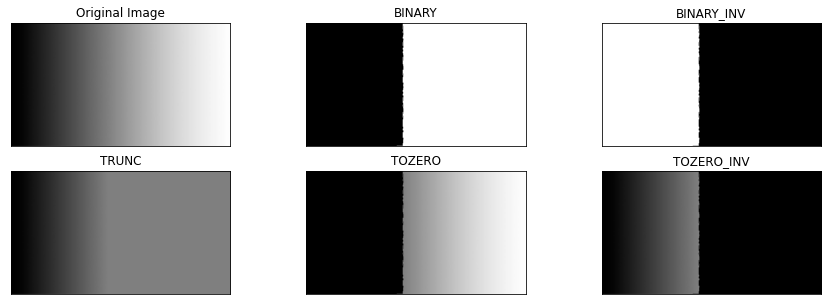

In [10]:
# Show images
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [image, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# No 4

In [11]:
# Import image
lena_filename = cv2.imread('/content/drive/MyDrive/PCVK/lena_gs_lc2.jpg', 0)
lena_image = cv2.GaussianBlur(lena_filename,(5,5),0)

In [12]:
# Get image's intensity
def get_intensity(image, intensity):
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):            
      intensity[image[y, x]] += 1  
  return intensity  

In [13]:
# Otsu method to search best threshold value
def otsu_threshold(image):
  best_threshold = 0
  best_class_variance = 0
  
  np.seterr(divide='ignore', invalid='ignore')
  for threshold in range(0, 256): 
    intensity = get_intensity(image, [0] * 256)  
    index_bg = np.array(range(0,threshold+1))
    index_fg = np.array(range(threshold,256))

    intensity_bg = intensity[0:threshold+1]
    intensity_fg = intensity[threshold:256]

    weight_bg = np.sum(intensity_bg)/255
    weight_fg = np.sum(intensity_fg)/255

    mean_bg = np.sum(intensity_bg * index_bg) / weight_bg
    mean_fg = np.sum(intensity_fg * index_fg) / weight_fg

    variance_bg = np.sum(((index_bg - mean_bg)**2)*intensity_bg)/weight_bg
    variance_fg = np.sum(((index_fg - mean_fg)**2)*intensity_fg)/weight_fg

    between_class_variance = weight_bg * weight_fg * ((mean_bg-mean_fg)**2)

    if between_class_variance > best_class_variance:
      best_class_variance = between_class_variance
      best_threshold = threshold 

  return best_threshold

In [14]:
# Thresholding process
global_threshold_value = 127
otsu_threshold_value = otsu_threshold(lena_image)

threshold1 = binary_threshold(lena_image, global_threshold_value)
threshold2 = binary_threshold(lena_image, otsu_threshold_value)

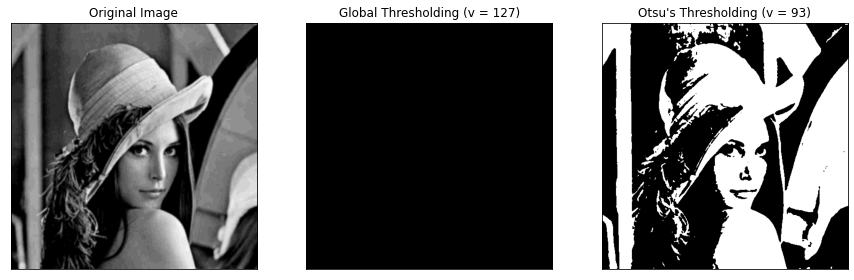

In [15]:
x = ("Otsu's Thresholding (v = ")+str(otsu_threshold_value)+")"
titles = ['Original Image', 'Global Thresholding (v = 127)', x]
images = [lena_image, threshold1, threshold2]

# Show figure
plt.figure(figsize = (15,10))
plt.title('Histogram Original Image')
for i in range(len(images)):
  plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')  
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

# No 5: Create a histogram from a segmented image

In [155]:
# No 5
lily_filename = cv2.imread('/content/drive/MyDrive/PCVK/lily.jpg')
lily_original = cv2.cvtColor(lily_filename, cv2.COLOR_BGR2RGB)
lily_image = cv2.cvtColor(lily_filename, cv2.COLOR_BGR2GRAY)
threshold = 212
# otsu_threshold_value = otsu_threshold(lily_image)

In [156]:
# Threshold process
thresh1 = binary_inverted_threshold(lily_image, threshold)

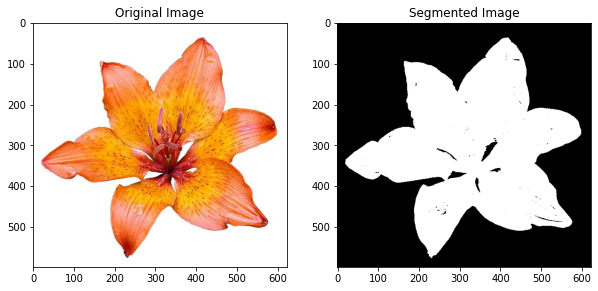

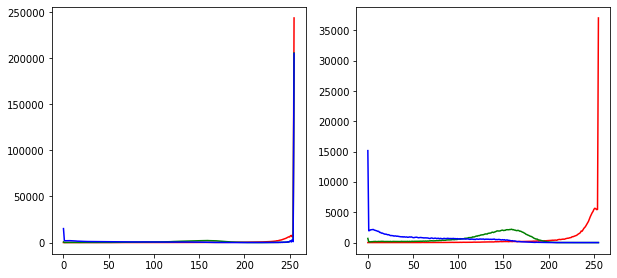

In [157]:
titles = ['Original Image', 'Segmented Image']
images = [lily_original, thresh1]
colors = 'r', 'g', 'b'

# Show plot
plt.figure(figsize = (10,10))
for i in range(len(images)):
  plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
  plt.title(titles[i])  
plt.show()

plt.figure(figsize = (10,10))
hist_plot_original = plt.subplot(2,2,1)
hist_plot_fg = plt.subplot(2,2,2)

for i in range(0, 3):
  hist = cv2.calcHist([lily_original], [i], None, [256], [0, 256])  
  hist2 = cv2.calcHist([lily_original], [i], thresh1, [256], [0, 256])
  hist_plot_original.plot(hist, color=colors[i])    
  hist_plot_fg.plot(hist2, color=colors[i])    

plt.show()

# Trying K-Means

(<matplotlib.axes._subplots.AxesSubplot at 0x7f0df8ec2dd0>,
 <matplotlib.image.AxesImage at 0x7f0df7570a10>)

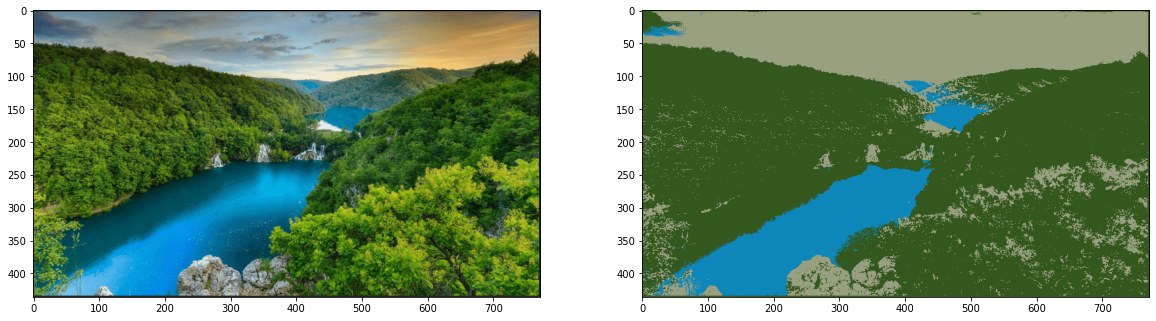

In [16]:
#KMeans Image Segmentation
filename = ('/content/drive/MyDrive/PCVK/jungle.png')
img = cv2.imread(filename)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

'''
we will use the function cv.kmeans () that asks array 2D as input, while
the image of the original is an array of 3D
Next we need to flatten the input image array
'''

#reshape array to 2D form
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
'''
The condition for stopping Dr. KMeans' iteration is if the centroid has not
shiftedtoo much position between current interaction with the previous iter
ation (convergent). Because the amount of data that is great, we will stop
iterating when the number of iterations = 100 or epsilon (the difference
between the position of the centroid skrg with the position of the centroid
in the iteration before) < 0.2
'''
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
'''
If you look at the original image , there are 3 main colors (green, blue,
and white / orange). for this experiment we will use 3 clusters for this
image
'''
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
#Convert centroid point to an integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# Reshape to the original image
segmented_image = segmented_image.reshape(img.shape)
plt.figure(figsize = (20,20))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(segmented_image)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f0df7537790>,
 <matplotlib.image.AxesImage at 0x7f0df9421f90>)

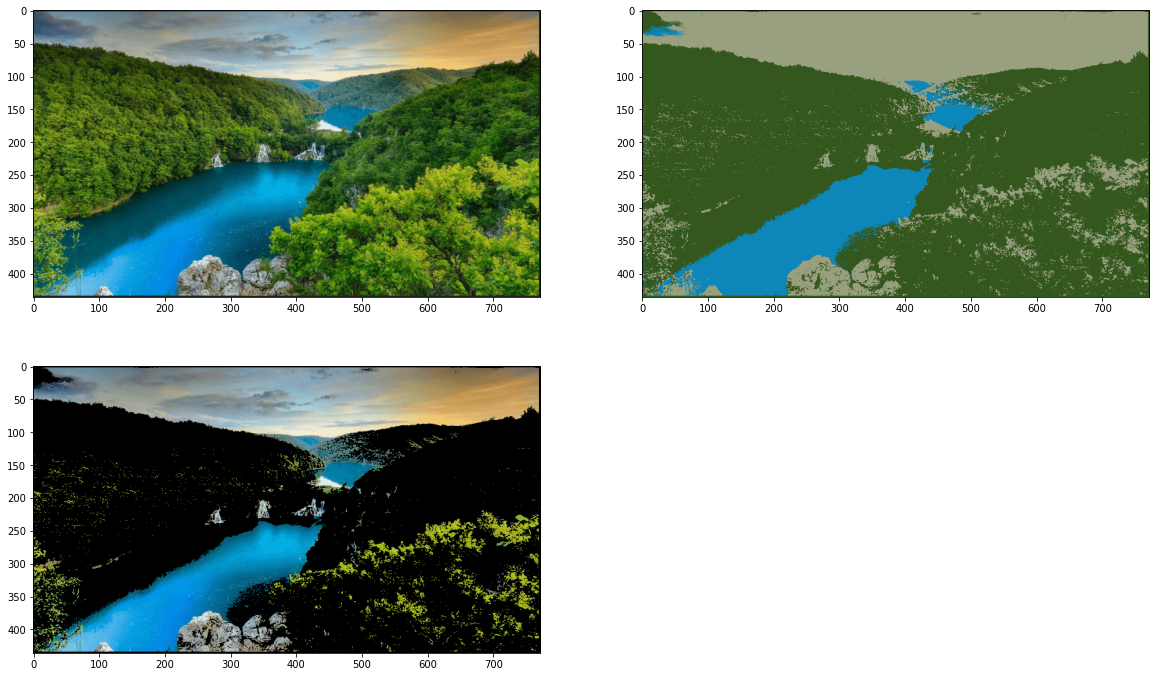

In [17]:
# ubah pixel di cluster 2 menjadi hitam
masked_image = np.copy(img)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-1, 3))
# cluster yang diubah
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# konvert ke bentuk asli
masked_image = masked_image.reshape(img.shape)
plt.figure(figsize = (20,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(segmented_image)
plt.subplot(2,2,3),plt.imshow(masked_image)

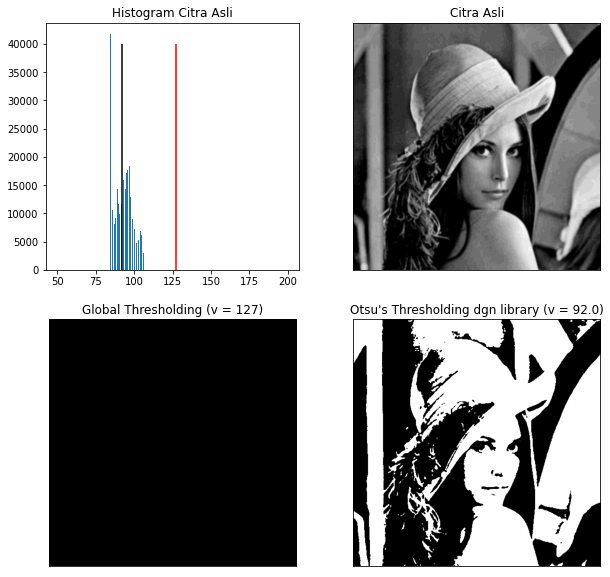

In [18]:
# No 5
# Dengan Library
filename = ('/content/drive/MyDrive/PCVK/lena_gs_lc2.jpg')
img = cv2.imread(filename,0)
blur = cv2.GaussianBlur(img,(5,5),0)
thresh = 127
ret,th1 = cv2.threshold(blur,thresh,255,cv2.THRESH_BINARY)
ret2,th2 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red') #garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black') #garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')
for i in range(len(citra3)):
  plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

# No 6: Change peppers.jpg to display only yellow

In [144]:
# KMeans image segmentation
peppers_filename = cv2.imread('/content/drive/MyDrive/PCVK/peppers.jpg')
peppers_image = cv2.cvtColor(peppers_filename,cv2.COLOR_BGR2RGB)

pixel_values = np.float32(peppers_image.reshape((-1, 3)))

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 5
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()

(<matplotlib.axes._subplots.AxesSubplot at 0x7f0deab822d0>,
 <matplotlib.image.AxesImage at 0x7f0deab7c890>)

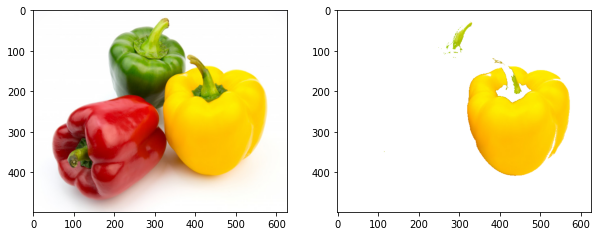

In [149]:
# Image masking
masked_image = np.copy(peppers_image)
masked_image = masked_image.reshape((-1, 3))
masked_image[labels != 0] = [255, 255, 255]
masked_image = masked_image.reshape(peppers_image.shape)

# Show figure
plt.figure(figsize = (10,10))
plt.subplot(1,2,1),plt.imshow(peppers_image)
plt.subplot(1,2,2),plt.imshow(masked_image)

# No 7: Convert crossword.jpg to binary image

In [152]:
# Import image
crossword_image = cv2.imread('/content/drive/MyDrive/PCVK/crossword.jpg', 0)

In [153]:
# Thresholding process
global_threshold_value = 127
otsu_threshold_value = otsu_threshold(crossword_image)

threshold1 = binary_threshold(crossword_image, global_threshold_value)
threshold2 = binary_threshold(crossword_image, otsu_threshold_value)

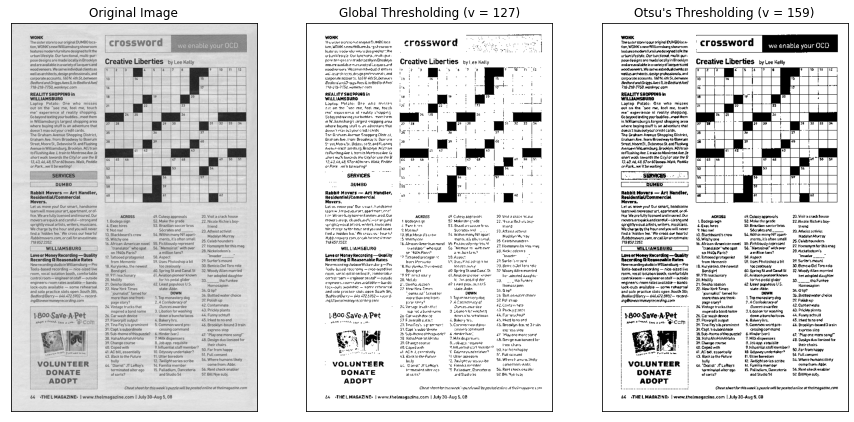

In [154]:
x = ("Otsu's Thresholding (v = ")+str(otsu_threshold_value)+")"
titles = ['Original Image', 'Global Thresholding (v = 127)', x]
images = [crossword_image, threshold1, threshold2]

# Show figure
plt.figure(figsize = (15,10))
plt.title('Histogram Original Image')
for i in range(len(images)):
  plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')  
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()